<a href="https://colab.research.google.com/github/uzma-knpc/Generative-AI/blob/main/NMIreader(promptchangeapp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Medical Images Diagnosis with Report(Finetune modal)

In [ ]:
!pip install -Uq facenet-pytorch
!pip install -Uq pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.2.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are install

In [ ]:
!pip install -U google-generativeai

In [ ]:
import google.generativeai as genai
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
import google.generativeai as genai
import os

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

import torchvision.transforms as transforms
from PIL import Image

In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# Load the pre-trained InceptionResnetV1 model
model = InceptionResnetV1(pretrained='vggface2').eval()



  0%|          | 0.00/107M [00:00<?, ?B/s]

In [ ]:
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from facenet_pytorch import InceptionResnetV1


# Preprocessing function to transform the image into a tensor
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)



In [ ]:
# Function to create image embeddings
def create_image_embedding(image_path):
    try:
        input_tensor = preprocess_image(image_path)
        with torch.no_grad():
            embeddings = model(input_tensor)# ebedding important line
        return embeddings.squeeze().numpy()
    except Exception as e:
        print("Error:", e)
        return None
# Save the fine-tuned model
torch.save(model.state_dict(), "fine_tuned_inception_resnet_v1.pth")


In [ ]:
#!mkdir images

In [ ]:
from google.colab import files
uploaded = files.upload()
for file_name in uploaded.keys():
  Image_path=file_name
  print(f"Uploaded file: {Image_path}")


In [ ]:
# prompt: create python function where we provide image url and imag_name then it save in images folder

import os
import shutil
import requests

def save_image_from_url(image_url, image_name):
    """
    Downloads an image from a URL or copies it from a local file path,
    and saves it to the 'images' folder.
    """
    try:
        # Create 'images' folder if it doesn't exist
        if not os.path.exists("images"):
            os.makedirs("images")

        image_path = os.path.join("images", image_name)

        # Check if the input is a URL or a local file path
        if image_url.startswith("http://") or image_url.startswith("https://"):
            # Download the image from a URL
            response = requests.get(image_url, stream=True)
            response.raise_for_status()  # Raise an exception for bad status codes

            # Save the image in chunks
            with open(image_path, 'wb') as file:
                for chunk in response.iter_content(chunk_size=8192):
                    file.write(chunk)

            print(f"Image downloaded and saved to: {image_path}")

            print(f"File exists: {os.path.exists(image_url)}")
            print(f"Is a file: {os.path.isfile(image_url)}")
            print(f"Invalid image URL or file path: {image_url}")


        elif os.path.exists(image_url) and os.path.isfile(image_url):
            # Debugging: Print file path validation info
            print(f"Local file path is valid: {image_url}")

            # Copy the image from a local file path
            shutil.copy(image_url, image_path)
            print(f"Image copied from local path and saved to: {image_path}")

        else:
            # Debugging: Print error for invalid paths
            print(f"file{image_path}")
            print(f"File exists: {os.path.exists(image_url)}")
            print(f"Is a file: {os.path.isfile(image_url)}")
            print(f"Invalid image URL or file path: {image_url}")

    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")



# Images loaded from net

In [ ]:
#save_image_from_url("https://prod-images-static.radiopaedia.org/images/48689902/0c2f5f49d11eb7d8a898cd79a70054_gallery.jpeg", "Nlung.jpg")
#save_image_from_url("https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-1-4614-8654-1_10/MediaObjects/217843_1_En_10_Fig2_HTML.jpg", "Renel.jpg")
#save_image_from_url(r"e:/thyaemc.jpeg", "thyroid.jpg")
#save_image_from_url(".images/Thyroid.jpeg", "Thyroid.jpeg")
save_image_from_url(Image_path, file_name)
#save_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRC9F_G4u8lJJ8O-c00QZp7AdhzPPhNxPDdKA&s","DMSAscan.jpg")
#save_image_from_url("https://ars.els-cdn.com/content/image/1-s2.0-S1930043318306022-gr1.jpg","lungscan.jpg")
#save_image_from_url("https://img.medscapestatic.com/pi/meds/ckb/51/26751tn.jpg","Bonescan.jpg","BS.jpg")
#save_image_from_url("https://ars.els-cdn.com/content/image/1-s2.0-S0001299823000296-gr2.jpg",'Thyroidscan.jpg')
#print("Image saved to:"/Users/uzmailyas/thy.jpeg",image_path)
#save_image_from_url("https://pub.mdpi-res.com/applsci/applsci-12-00698/article_deploy/html/images/applsci-12-00698-g001.png?1642052715","RenelScan.jpg")

# EMBEDDING

In [ ]:
#d = create_image_embedding("./images/DMSAscan.jpg")
#m = create_image_embedding("./images/Renel.jpg")
m = create_image_embedding(Image_path)
#l = create_image_embedding("./images/lungscan.jpg")
#n = create_image_embedding("./images/Nlung.jpg")
#t = create_image_embedding("./images/Thyroidscan.jpg")
#r = create_image_embedding("./images/RenelScan.jpg")

#print(f"Result:{m},shape:{getattr(m,'shape,'not an array')}")
print(f"Result:{m},shape:{m.shape}")

In [ ]:
!pip install -U milvus-lite

!pip install -U pymilvus


In [ ]:
# Paths to your uploaded images and titles
file_paths = [
   # "images/DMSAscan.jpg",
    Image_path,
   # "images/lungscan.jpg",
   # "images/Thyroidscan.jpg",
   # "images/RenelScan.jpg" ,
   # "images/Nlung.jpg" ,  # Replace with actual file paths for each image

]
titles = [
   # "DMSA Scan (ID: 1)",
   file_name,
    #"Lung Scan (ID: 3)",
   # "Thyroid Scan (ID: 4)",
   # "Renal Scan (ID: 5)",
   # "NormalScan (ID: 6)",
]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import datetime

# Function to load an image and convert it to grayscale
def load_image(file_path):
    img = Image.open(file_path).convert("L")
    img_array = np.array(img)
    return img_array

In [ ]:
# Function to normalize the image intensity
def normalize_image(img):
    img_min, img_max = img.min(), img.max()
    normalized_img = (img - img_min) / (img_max - img_min)
    return normalized_img


In [ ]:
# Diagnostic function with criteria
def diagnose_image(img):
    mean_intensity = np.mean(img)
    std_intensity = np.std(img)
    threshold_mean = 0.5
    threshold_std = 0.1

    # Criteria for diagnosis
    if mean_intensity > threshold_mean and std_intensity > threshold_std:
        return "Abnormal scan detected"
    else:
        return "Scan appears normal"

In [ ]:
# Function to calculate image metrics
def calculate_metrics(img):
    return {
        "Mean Intensity": np.mean(img),
        "Standard Deviation": np.std(img),
        "Minimum Intensity": np.min(img),
        "Maximum Intensity": np.max(img)
    }

In [ ]:
from PIL import Image

#image_path = './images/thyaemc.jpeg'
#image_path=os.path(Image_path)
    #image_path= input("Enter the full path to the image file: ")
image = Image.open(Image_path)  # Load the image
image
prompt1 = """This image contains a human organ image  along with some notes and graph
          Given the Medical image, "Analyze the given medical image and extract
          the patient details from image and return the results in formated style.

    Patient_Detail: [
    "Name",
    "PRN-NO",
    "Isotop",
    "Scan Date",
    ...
  ]
}
          """
prompt = """This image contains a human organ image  along with some notes and graph
          Given the Medical image, describe the parameters  thoroughly as possible based on what you
          see in the image, "Analyze the given medical image, which includes a human organ along with notes and a graph. Provide a detailed description of the organ, including its features, intensity, and any observed parameters.
          Based on the image, by this analysis a conclusive advice given to Patient  and return the results in JSON format.

    DESCRIPTION: "\n<Provide a detailed description of the organ>\n",
    PRIDICTION: "\n<Provide a provisional or confirmed diagnosis>\n,
    ABNORMALITIES:<Provide a detailed description of the organ>",
    if organ is "Thyroid" and 50 to 60mm then it is normal ,  take following quantities"

    QAUNTITATIVE MEASUREMENTS:[
      "Organ size",
      "Region of Intrest",
      "Intensity",
      "Number of Nodules",
      "standard uptake value",
      "Type of Radiolabeled substance",
      ...
    ]
    Organ Features: [
    "feature1",
    "feature2",
    "feature3",
    "feature4",
    ...
    ]
    if organ is "Renal" and 40 to 50% uptake then it is normal ,  take following quantities"

    QAUNTITATIVE MEASUREMENTS:[
      "Organ size",
      "Region of Intrest",
      "Intensity",
      "Blood perfusion Percent",
      "Uptake% value,
      ...
    ]
    Organ Features: [
    "feature1",
    "feature2",
    "feature3",
    "feature4",
    ...
  ]
  if organ is "Bone Scan"  ,  take following quantities"

    QAUNTITATIVE MEASUREMENTS:[
      "Organ size",
      "Region of Intrest",
      "Intensity",
      "Number of counts",
      standard uptake value,
      ...
    ]
    Organ Features: [
    "feature1",
    "feature2",
    "feature3",
    "feature4",
    ...
    ]
}

          """
model_gen= genai.GenerativeModel('gemini-1.5-flash')
response_gen= model_gen.generate_content([prompt, image])
response_gen1= model_gen.generate_content([prompt1, image])
#print(response.text)


#print(f"\n Human Prompt:-{prompt}")
#print(f"\nResponse: {response_gen.text}\n")


In [ ]:
# Function to generate a medical report
def generate_report(scan_id, scan_name, diagnosis, metrics, doctor_name):
    report = f"""
    ============================================================================
                     NAME OF MEDICAL CENTRE, PAKISTAN
                (NMI- Artifical Inteligence Image Reader Report)
    ============================================================================
    Diagnosis          : {diagnosis}

   Patient-Details:  {response_gen1.text}
   ----------------------------------------------------------------------------


    Clinical Feature:
    ----------------------------------------------------------------------------
    Mean Intensity     : {metrics["Mean Intensity"]:.4f}
    Standard Deviation : {metrics["Standard Deviation"]:.4f}
    Minimum Intensity  : {metrics["Minimum Intensity"]:.4f}
    Maximum Intensity  : {metrics["Maximum Intensity"]:.4f}

    Analysis:
    ----------------------------------------------------------------------------
    {response_gen.text}



    Report Generated by:
    Doctor             : {doctor_name}
    Date               : {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
    ============================================================================
                                                      Head of the Establishment
                                                    Consultant Nuclear Physician
    """
    return report

In [ ]:
def process_and_generate_reports(file_paths, titles, doctor_name):
    reports = []  # Initialize an empty list to store the reports
    rows, cols = 2, 3
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, (file_path, title) in enumerate(zip(file_paths, titles)):
        if i >= len(axes):
            break

        img = load_image(file_path)
        imgname=titles[i]
        normalized_img = normalize_image(img)
        diagnosis = diagnose_image(normalized_img)
        metrics = calculate_metrics(normalized_img)
        scan_id = i + 1

        # Append report
        report = generate_report(scan_id, title, diagnosis, metrics, doctor_name)
        reports.append(report)

        # Display image with diagnosis
        ax = axes[i]
        im = ax.imshow(normalized_img, cmap="gray")
        ax.set_title(f"{title}\n{diagnosis}", fontsize=10)
        ax.axis("off")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    # Add colorbar
    plt.tight_layout()
    plt.show()

    return reports  # Return the generated reports list


Duty DoctorDr.Asma


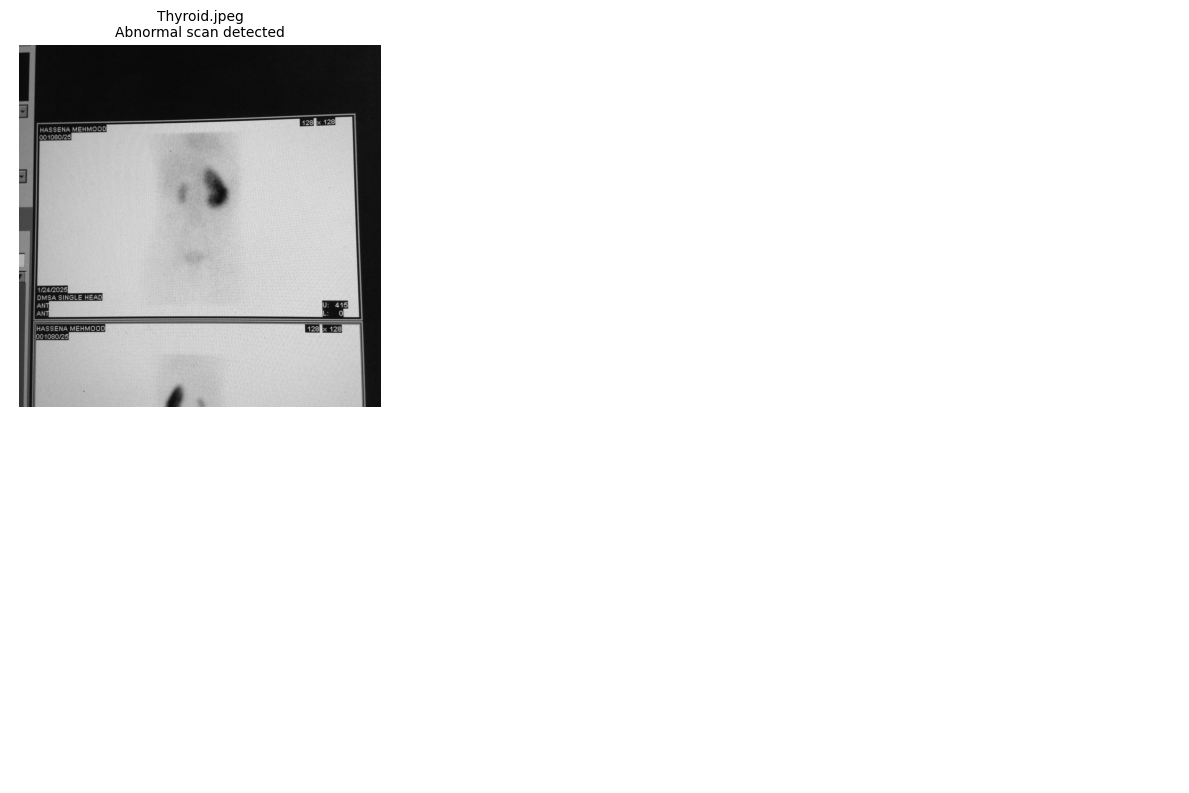

Reports generated and saved as 'medical_reports.txt'.


In [ ]:

#Meta Data

# Doctor's name
doctor_name = input("Duty Doctor")  # Replace with actual doctor's name

# Process the images and generate reports
reports = process_and_generate_reports(file_paths, titles, doctor_name)


# Save reports to a text file
with open("medical_reports.txt", "w") as f:
    for report in reports:
        f.write(report + "\n\n")  # Use the correct `report` variable
print("Reports generated and saved as 'medical_reports.txt'.")

In [ ]:
from PIL import Image

image_path = 'images/MAG3scan.jpg'
image = Image.open(image_path)  # Load the image

In [ ]:
prompt = """This image contains a human organ image  along with some notes and graph
          Given the Medical image, describe the parameters  thoroughly as possible based on what you
          see in the image, making sure to note all of the organ features and intensity and make simple RENOGRAM. Return output in json format:
          {description:, diagnosis,Renogram features: [feature1, feature2, feature3, etc]}"""


In [ ]:
model_gen= genai.GenerativeModel('gemini-1.5-flash')
response_gen= model_gen.generate_content([prompt, image])
#print(response.text)


print(f"\n Human Prompt:-{prompt}")
print(f"\nResponse: {response_gen.text}\n")


 Human Prompt:-This image contains a human organ image  along with some notes and graph
          Given the Medical image, describe the parameters  thoroughly as possible based on what you
          see in the image, making sure to note all of the organ features and intensity and make simple RENOGRAM. Return output in json format:
          {description:, diagnosis,Renogram features: [feature1, feature2, feature3, etc]}

Response: ```json
{
  "description": "The image appears to be a renal scan, likely a diuretic renogram, showing the uptake and excretion of a radioisotope by the kidneys.  The scan displays two kidneys, with a central region representing the bladder. The kidneys exhibit asymmetry in radioisotope uptake and excretion. The left kidney shows significantly reduced uptake and excretion compared to the right kidney.  There is also evidence of delayed excretion in both kidneys, especially the left one. The image quality is somewhat grainy, making precise measurements difficu